In [2]:
# Cleaning and dealing with missing values

import pandas as pd

# Load the dataset
data = pd.read_csv("data\scraped_data_team_18.csv")

# Check for missing values
missing_values = data.isnull().sum()

print("Missing Values per Column:")
print(missing_values)

# Dealing with missing values
# Correctly handle "age_limit" as a textual column
if "age_limit" in data.columns:
    data["age_limit"] = data["age_limit"].fillna("No age limit specified")

# For textual columns like "description", replace missing values with a placeholder
if "description" in data.columns:
    data["description"] = data["description"].fillna("No description available")

# Check again to confirm all missing values are handled
missing_values_after = data.isnull().sum()

print("\nMissing Values after Handling:")
print(missing_values_after)

# Rename columns
column_rename_map = {
    "currency": "Currency",
    "asset_url": "Asset URL",
    "map_url": "Map URL",
    "age_limit": "Age Limit",
    "artist_bg_url": "Artist Background URL",
    "artist_url": "Artist URL",
    "available_tickets": "Available Tickets",
    "category_slug": "Category",
    "cover_url": "Cover URL",
    "description": "Description",
    "event_start": "Event Start",
    "event_end": "Event End",
    "is_refundable": "Refundable",
    "max_price": "Maximum Price",
    "min_price": "Minimum Price",
    "gallery_images": "Gallery Images",
    "facebook_url": "Facebook URL",
    "description_meta": "Description Meta",
    "title_meta": "Title Meta",
    "event_name": "Event Name",
    "poster_created_at": "Poster Created At",
    "poster_galleryable_type": "Poster Type",
    "poster_updated_at": "Poster Updated At",
    "poster_tag_count": "Tag Count",
    "event_link": "Event Link"
}
data.rename(columns=column_rename_map, inplace=True)

# Reorder columns to include all in a logical order
column_order = [
    "Event Name", "Category", "Age Limit", "Available Tickets", "Minimum Price", "Maximum Price",
    "Event Start", "Event End", "Description", "Refundable", "Currency", "Event Link", "Asset URL",
    "Map URL", "Artist Background URL", "Artist URL", "Cover URL", "Gallery Images", "Facebook URL",
    "Description Meta", "Title Meta", "Poster Created At", "Poster Type", "Poster Updated At", "Tag Count"
]
data = data[column_order] 

# Check and fix data types for specific columns
# Convert "Available Tickets", "Minimum Price", "Maximum Price", and "Tag Count" to integers
if data["Available Tickets"].dtype != 'int64':
    data["Available Tickets"] = data["Available Tickets"].astype(int)
if data["Minimum Price"].dtype != 'int64':
    data["Minimum Price"] = data["Minimum Price"].astype(int)
if data["Maximum Price"].dtype != 'int64':
    data["Maximum Price"] = data["Maximum Price"].astype(int)
if data["Tag Count"].dtype != 'int64':
    data["Tag Count"] = data["Tag Count"].astype(int)

# Convert "Event Start" and "Event End" to datetime
if data["Event Start"].dtype != 'datetime64[ns]':
    data["Event Start"] = pd.to_datetime(data["Event Start"], errors='coerce')
if data["Event End"].dtype != 'datetime64[ns]':
    data["Event End"] = pd.to_datetime(data["Event End"], errors='coerce')

# Save the cleaned dataset as a new CSV file
data.to_csv("processed_data_team_18.csv", index=False)

print("\nProcessed data saved to 'processed_data_team_18.csv'.")


Missing Values per Column:
currency                   0
asset_url                  0
map_url                    0
age_limit                  1
artist_bg_url              0
artist_url                 0
available_tickets          0
category_slug              0
cover_url                  0
description                6
event_start                0
event_end                  0
is_refundable              0
max_price                  0
min_price                  0
gallery_images             0
facebook_url               0
description_meta           6
title_meta                 0
event_name                 0
poster_created_at          0
poster_galleryable_type    0
poster_updated_at          0
poster_tag_count           0
event_link                 0
dtype: int64

Missing Values after Handling:
currency                   0
asset_url                  0
map_url                    0
age_limit                  0
artist_bg_url              0
artist_url                 0
available_tickets          0


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14668\3564789682.py:6: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("data\scraped_data_team_18.csv")


In [43]:
# Display first few rows and basic info
data.head(5)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Event Name             170 non-null    object             
 1   Category               170 non-null    object             
 2   Age Limit              170 non-null    object             
 3   Available Tickets      170 non-null    int64              
 4   Minimum Price          170 non-null    int64              
 5   Maximum Price          170 non-null    int64              
 6   Event Start            170 non-null    datetime64[ns, UTC]
 7   Event End              170 non-null    datetime64[ns, UTC]
 8   Description            170 non-null    object             
 9   Refundable             170 non-null    bool               
 10  Currency               170 non-null    object             
 11  Event Link             170 non-null    object             

,Available Tickets,Minimum Price,Maximum Price,Tag Count
count,170.000000,170.000000,170.000000,170.0
mean,616.864706,12.847059,33.064706,5.0
std,2583.868596,11.496339,58.473900,0.0
min,0.000000,3.000000,3.000000,5.0
25%,51.000000,7.000000,10.000000,5.0
50%,206.500000,10.000000,15.000000,5.0
75%,485.750000,15.000000,25.000000,5.0
max,26189.000000,90.000000,500.000000,5.0


In [4]:
print(data.columns)

Index(['Event Name', 'Category', 'Age Limit', 'Available Tickets',
       'Minimum Price', 'Maximum Price', 'Event Start', 'Event End',
       'Description', 'Refundable', 'Currency', 'Event Link', 'Asset URL',
       'Map URL', 'Artist Background URL', 'Artist URL', 'Cover URL',
       'Gallery Images', 'Facebook URL', 'Description Meta', 'Title Meta',
       'Poster Created At', 'Poster Type', 'Poster Updated At', 'Tag Count',
       'Month', 'Day of Week', 'Duration'],
      dtype='object')


<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\2895275965.py:12: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv("data\processed_data_team_18.csv")


1. Basic Information
Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Event Name             169 non-null    object             
 1   Category               169 non-null    object             
 2   Age Limit              169 non-null    object             
 3   Available Tickets      169 non-null    int64              
 4   Minimum Price          169 non-null    int64              
 5   Maximum Price          169 non-null    int64              
 6   Event Start            169 non-null    datetime64[ns, UTC]
 7   Event End              169 non-null    datetime64[ns, UTC]
 8   Description            169 non-null    object             
 9   Refundable             169 non-null    bool               
 10  Currency               169 non-null    object             
 11  Event Link

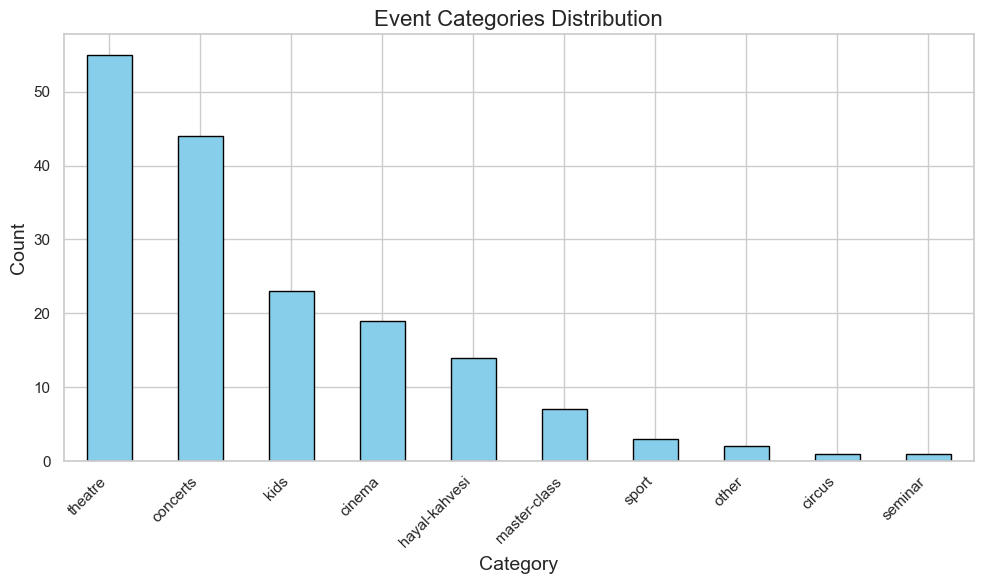


 5. Revenue Insights

Total Revenue by Category:
Category
cinema            146
circus             40
concerts         3339
hayal-kahvesi     435
kids              492
master-class      126
other             100
seminar            66
sport              16
theatre           831
Name: Maximum Price, dtype: int64


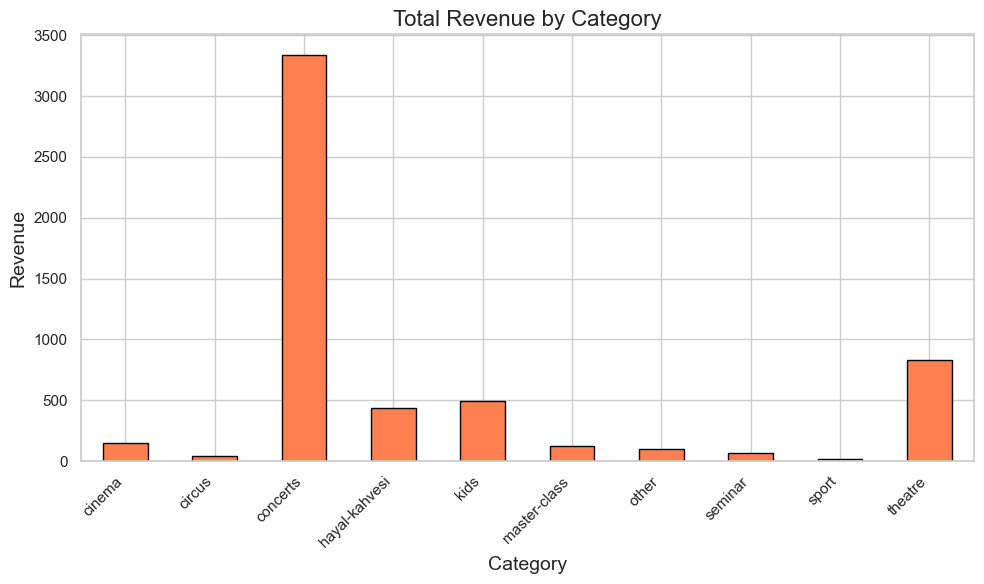


 6. Time-Based Analysis


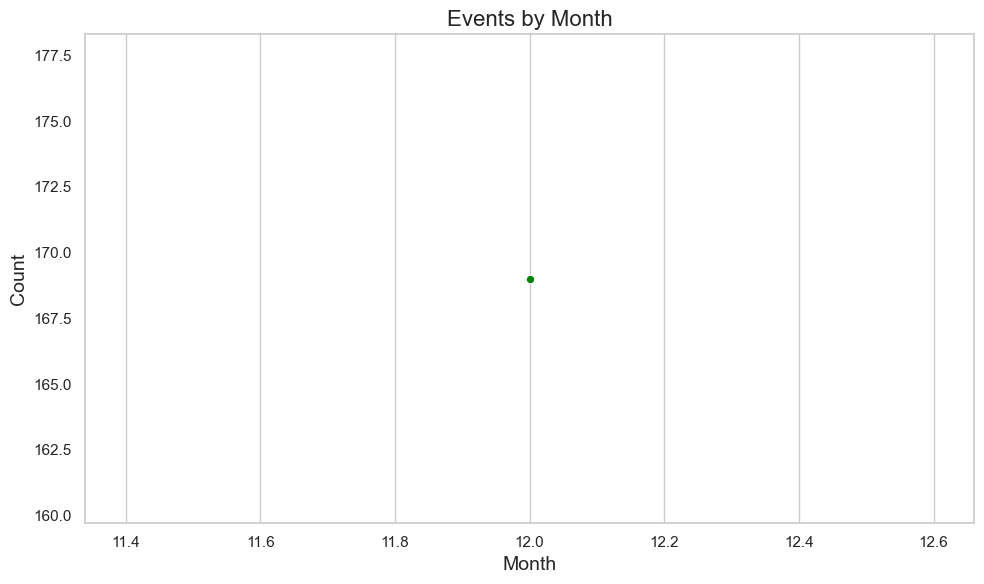

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\2895275965.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=events_by_day.index, y=events_by_day.values, palette="pastel")


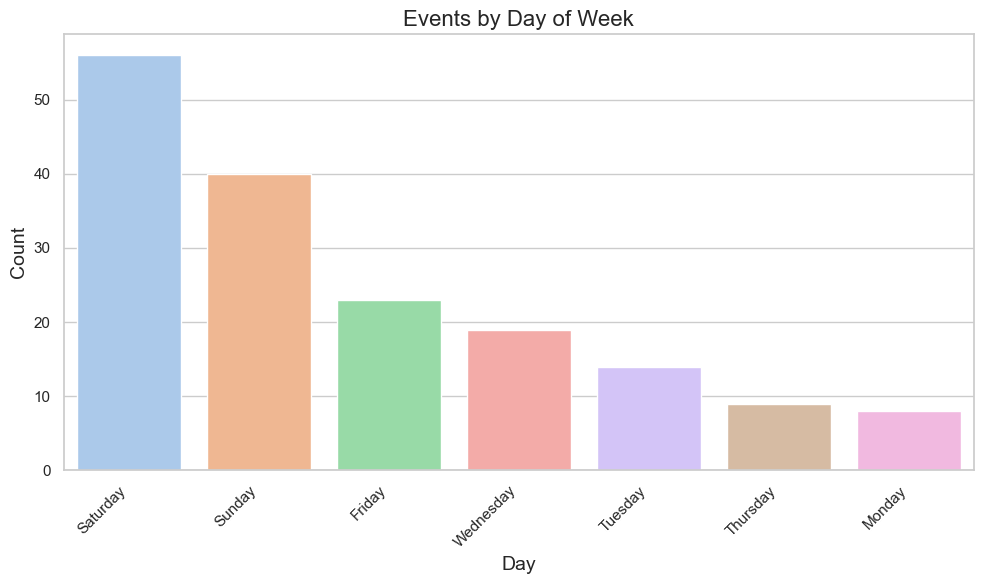


7. Event Duration


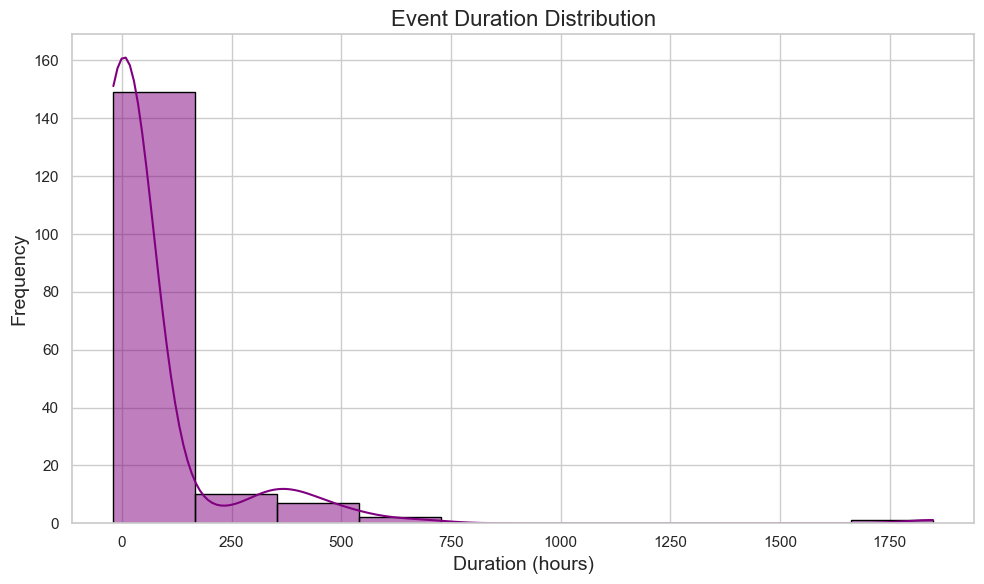


8. Ticket Pricing Analysis


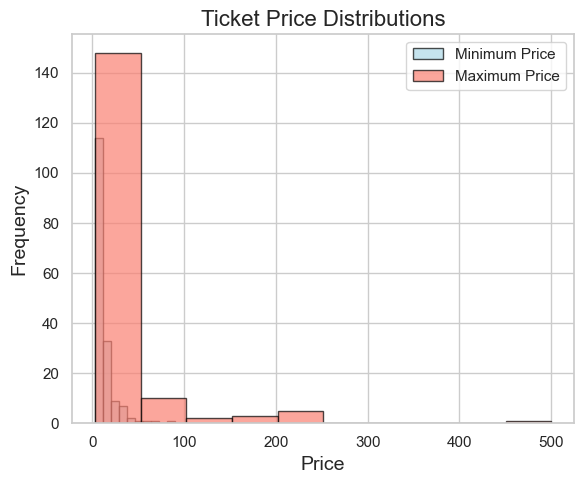


Average Ticket Prices by Category:
               Minimum Price  Maximum Price
Category                                   
cinema              7.684211       7.684211
circus             10.000000      40.000000
concerts           17.318182      75.886364
hayal-kahvesi      13.357143      31.071429
kids               10.565217      21.391304
master-class       18.000000      18.000000
other              10.000000      50.000000
seminar            66.000000      66.000000
sport               4.333333       5.333333
theatre            10.563636      15.109091


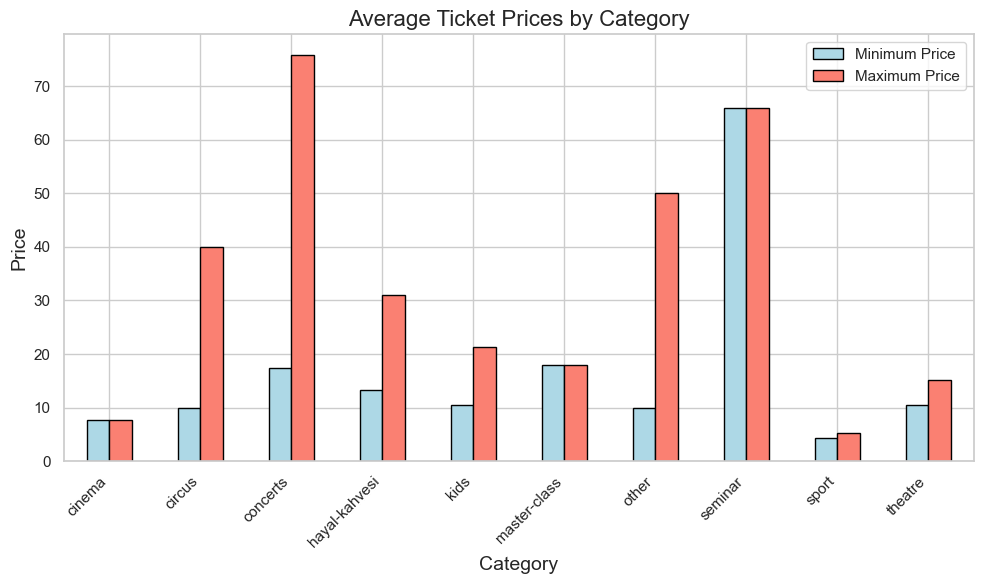


9. Popular Events

Top Events by Ticket Availability:
                                            Event Name  Available Tickets
125                          Jyrtdan - World of Colors              26189
23                        International Circus “Union”              21355
168                                       Winter story               2895
34   "Winter  fairytale" international rhythmic gym...               2146
16   Legendary Lionel Messi and His Teammates Are C...               1806
8    Legendary Lionel Messi and His Teammates Are C...               1806
65                                  Illuminated Circus               1786
11          29th Baku Rhythmic Gymnastics Championship               1209
1           29th Baku Rhythmic Gymnastics Championship               1209
12                      Creative master class for kids               1202


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\2895275965.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events['Event Name'], y=top_events['Available Tickets'], palette="muted")


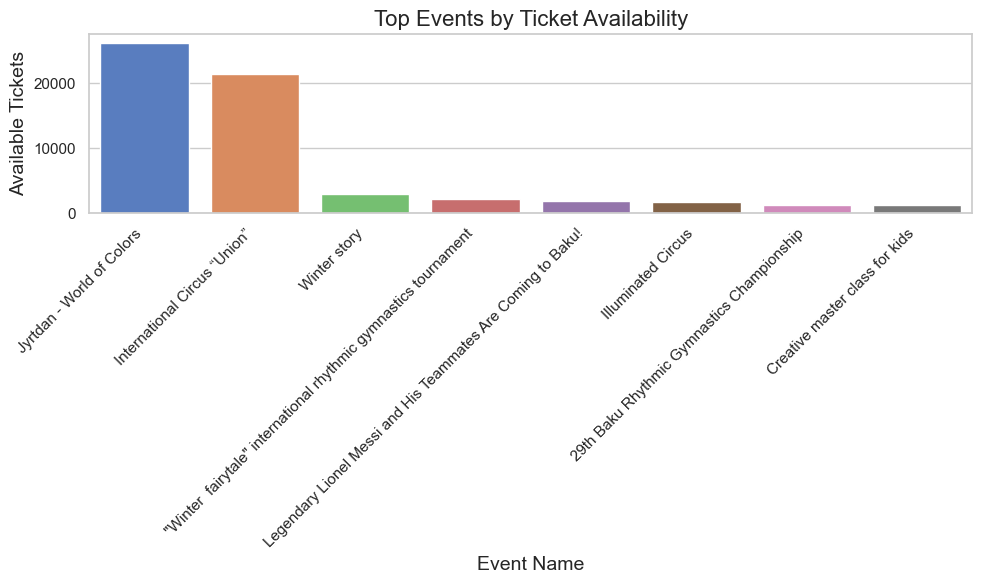


10. Correlation Analysis

Correlation Matrix:
                   Available Tickets  Minimum Price  Maximum Price  Tag Count  \
Available Tickets           1.000000      -0.029527       0.038916        NaN   
Minimum Price              -0.029527       1.000000       0.778699        NaN   
Maximum Price               0.038916       0.778699       1.000000        NaN   
Tag Count                        NaN            NaN            NaN        NaN   
Month                            NaN            NaN            NaN        NaN   
Duration                    0.240472      -0.010683      -0.065367        NaN   

                   Month  Duration  
Available Tickets    NaN  0.240472  
Minimum Price        NaN -0.010683  
Maximum Price        NaN -0.065367  
Tag Count            NaN       NaN  
Month                NaN       NaN  
Duration             NaN  1.000000  


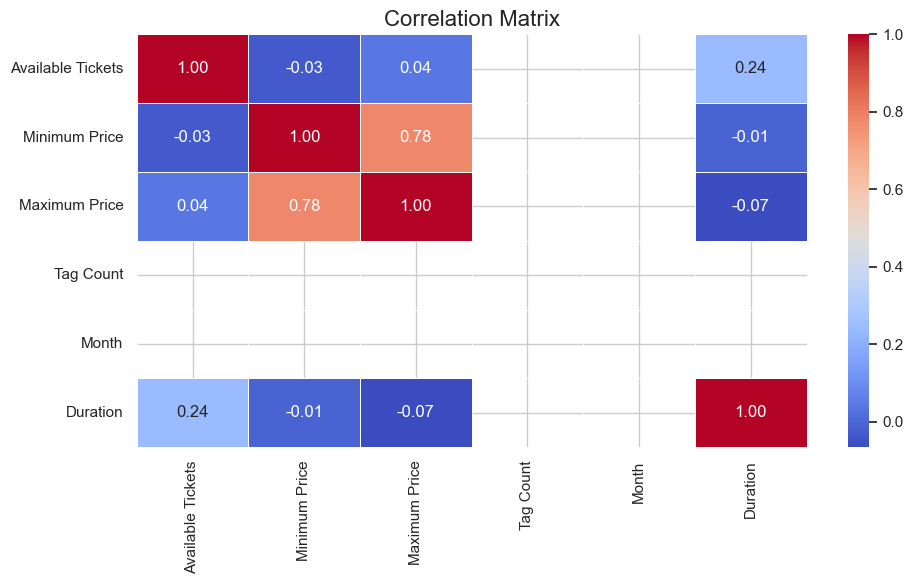


11. Age Limit and Category Correlation

Category Distribution by Age Limit:
Category   cinema  circus  concerts  hayal-kahvesi  kids  master-class  other  \
Age Limit                                                                       
+6            0.0     0.0       1.0            0.0   0.0           0.0    0.0   
0+            0.0     0.0       0.0            0.0   9.0           0.0    0.0   
12+          10.0     0.0       8.0            0.0   0.0           0.0    0.0   
13+           0.0     0.0       0.0            0.0   0.0           0.0    0.0   
14+           0.0     0.0       0.0            0.0   0.0           0.0    0.0   
16+           2.0     0.0       2.0            4.0   0.0           0.0    0.0   
18+           0.0     0.0       2.0           10.0   0.0           0.0    0.0   
3+            3.0     1.0       0.0            0.0  10.0           4.0    0.0   
4+            0.0     0.0       0.0            0.0   0.0           1.0    0.0   
4-15          0.0     0.0       

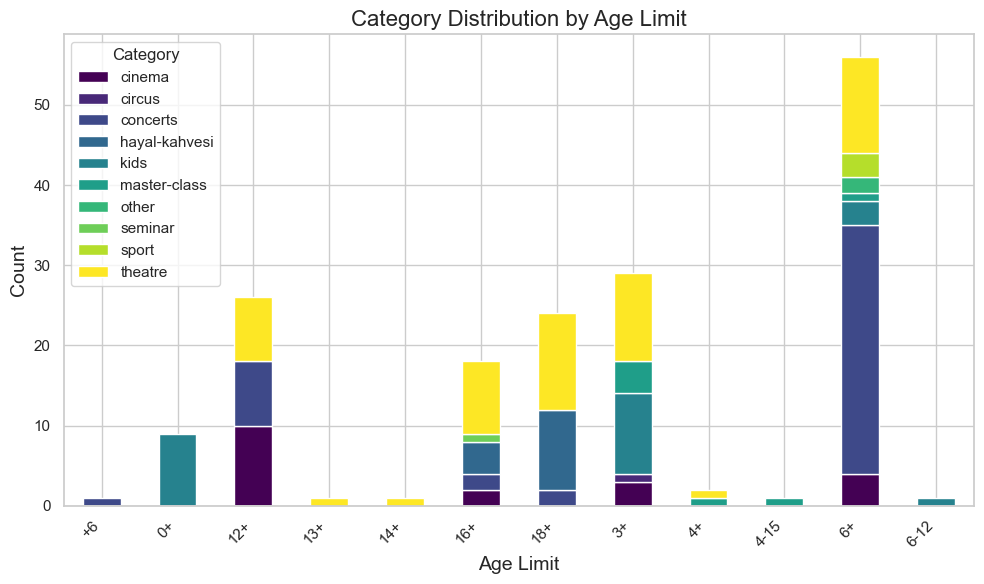


12. Event Duration vs. Pricing


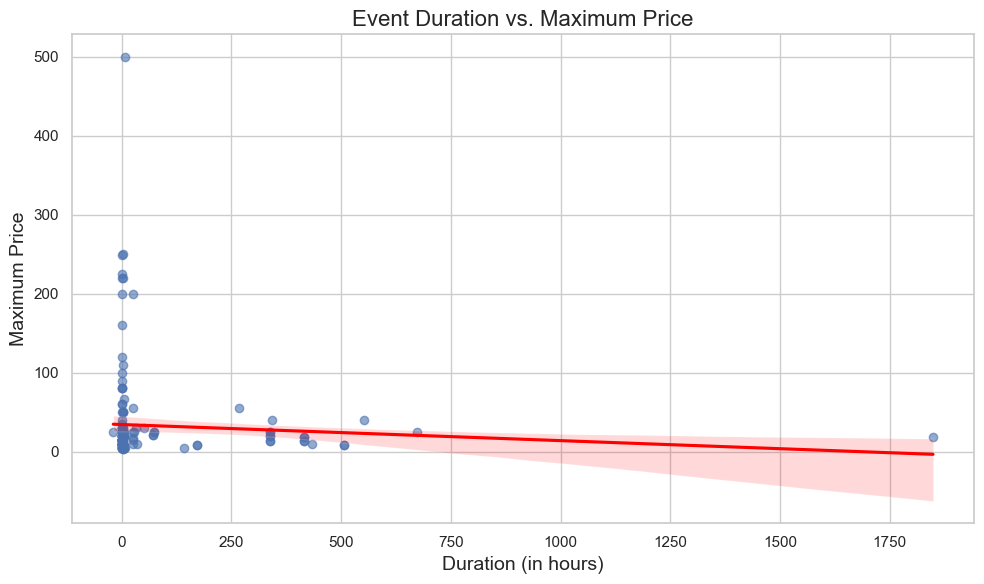


13. Refund Policy Insights

Refundable Events Count:
Refundable
True    169
Name: count, dtype: int64


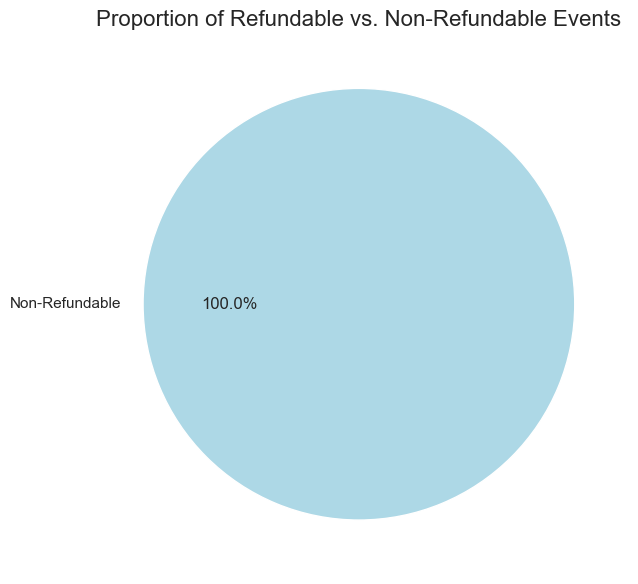

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\2895275965.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Refundable", y="Maximum Price", data=data, palette="Set2")


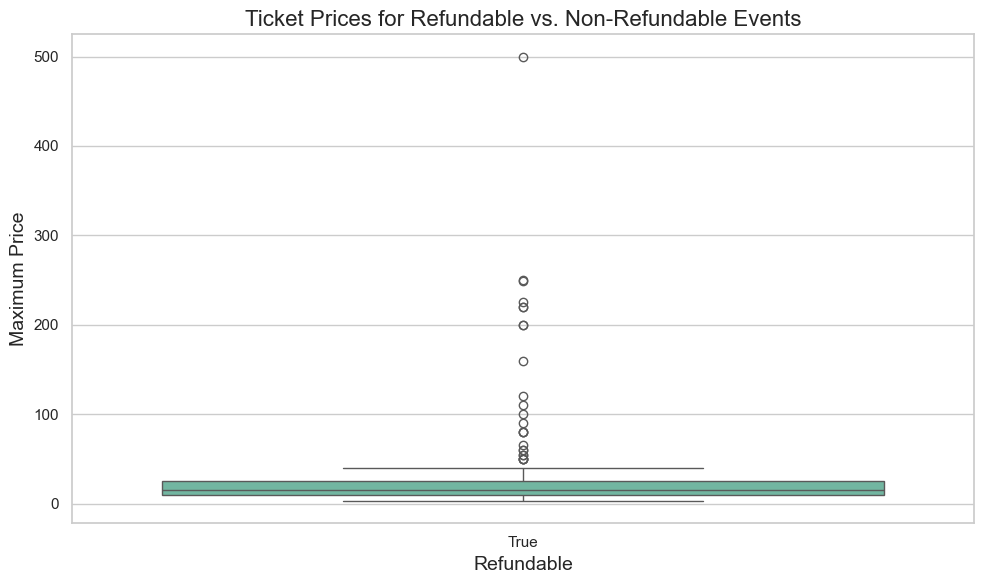


14. Event Popularity by Tag Count

Correlation between Tag Count and Available Tickets:
                   Tag Count  Available Tickets
Tag Count                NaN                NaN
Available Tickets        NaN                1.0


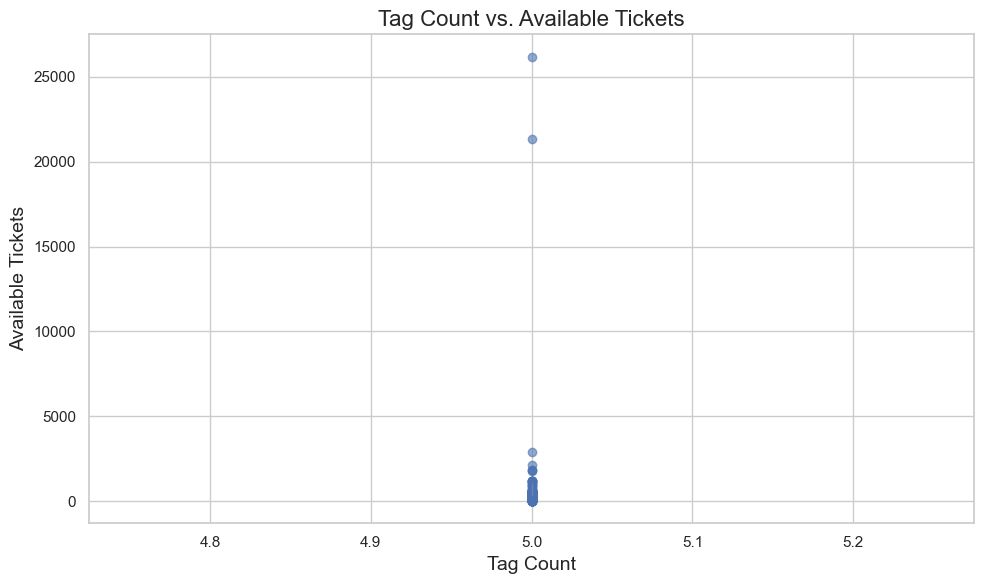

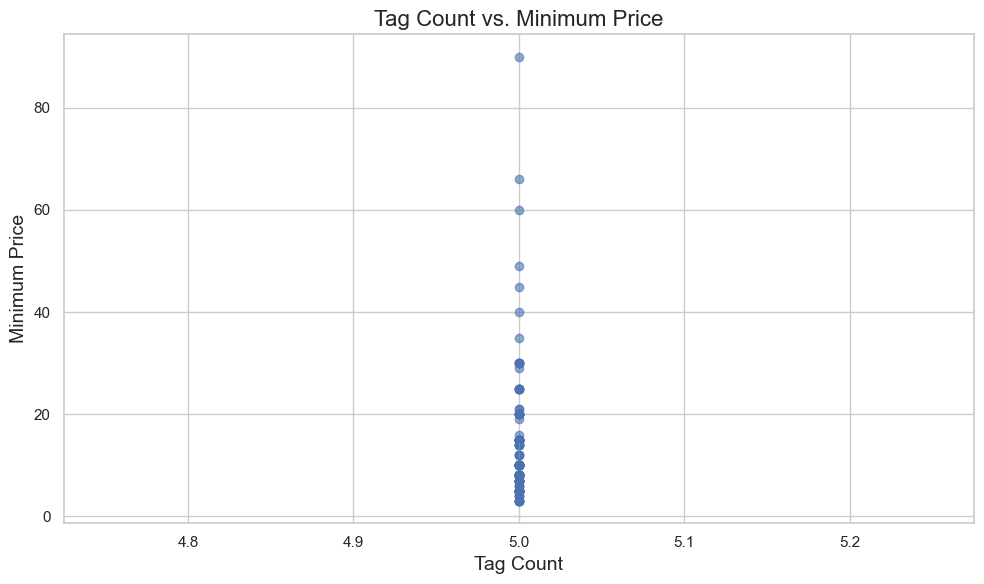

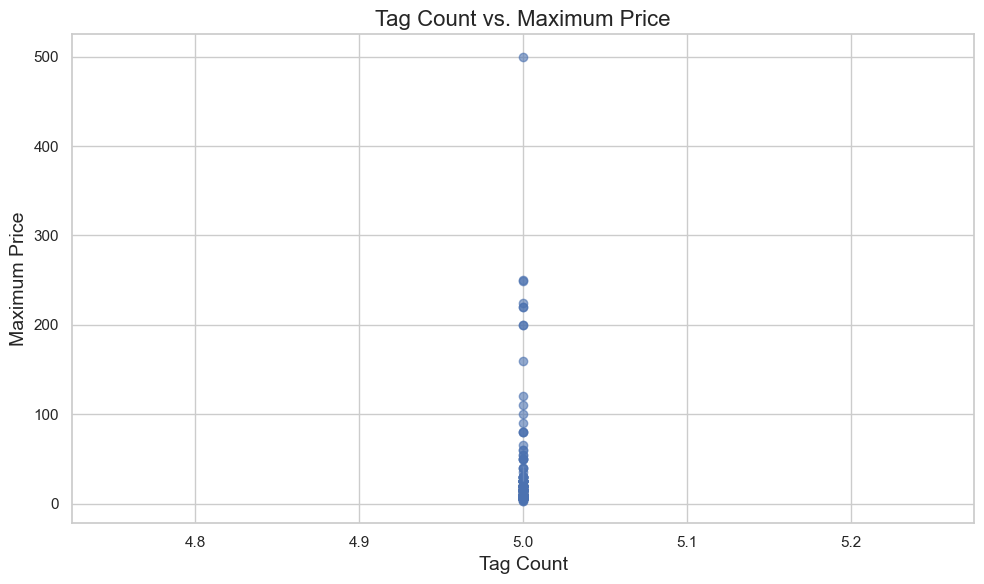



 Completed.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization defaults
sns.set(style="whitegrid")  # Use a clean grid style
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size
plt.rcParams['axes.titlesize'] = 16  # Title size
plt.rcParams['axes.labelsize'] = 14  # Label size

# Load the dataset
data = pd.read_csv("data\processed_data_team_18.csv")

# Convert datetime columns
if "Event Start" in data.columns:
    data["Event Start"] = pd.to_datetime(data["Event Start"], errors='coerce')
if "Event End" in data.columns:
    data["Event End"] = pd.to_datetime(data["Event End"], errors='coerce')

print("1. Basic Information")
print("Basic Dataset Information:")
print(data.info())
print()

print(" 2. Missing Values")
print("\nMissing Values per Column:")
print(data.isnull().sum())
print()

print("3. Summary Statistics")
print("\nSummary Statistics:")
print(data.describe())
print()

print("4. Distribution of Categories")
if "Category" in data.columns:
    category_counts = data["Category"].value_counts()
    print("\nEvent Categories:")
    print(category_counts)
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Event Categories Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print()

    
print(" 5. Revenue Insights")
if "Maximum Price" in data.columns and "Category" in data.columns:
    category_revenue = data.groupby("Category")["Maximum Price"].sum()
    print("\nTotal Revenue by Category:")
    print(category_revenue)
    category_revenue.plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Total Revenue by Category')
    plt.xlabel('Category')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print()


print(" 6. Time-Based Analysis")
if "Event Start" in data.columns:
    data['Month'] = data["Event Start"].dt.month
    data['Day of Week'] = data["Event Start"].dt.day_name()

    events_by_month = data['Month'].value_counts().sort_index()
    sns.lineplot(x=events_by_month.index, y=events_by_month.values, marker="o", color="green")
    plt.title('Events by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    events_by_day = data['Day of Week'].value_counts()
    sns.barplot(x=events_by_day.index, y=events_by_day.values, palette="pastel")
    plt.title('Events by Day of Week')
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print()


print("7. Event Duration")
if "Event End" in data.columns:
    data['Duration'] = (data["Event End"] - data["Event Start"]).dt.total_seconds() / 3600
    sns.histplot(data['Duration'].dropna(), bins=10, kde=True, color='purple', edgecolor='black')
    plt.title('Event Duration Distribution')
    plt.xlabel('Duration (hours)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
print()


print("8. Ticket Pricing Analysis")
if "Minimum Price" in data.columns and "Maximum Price" in data.columns:
    # Plot histograms separately for each column
    data["Minimum Price"].hist(bins=10, figsize=(6, 5), color='lightblue', edgecolor='black', alpha=0.7, label="Minimum Price")
    data["Maximum Price"].hist(bins=10, figsize=(6, 5), color='salmon', edgecolor='black', alpha=0.7, label="Maximum Price")
    plt.title('Ticket Price Distributions')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Average prices per category
    avg_price_per_category = data.groupby("Category")[['Minimum Price', 'Maximum Price']].mean()
    print("\nAverage Ticket Prices by Category:")
    print(avg_price_per_category)
    avg_price_per_category.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')
    plt.title('Average Ticket Prices by Category')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print()



print("9. Popular Events")
if "Available Tickets" in data.columns:
    top_events = data.sort_values(by="Available Tickets", ascending=False).head(10)
    print("\nTop Events by Ticket Availability:")
    print(top_events[["Event Name", "Available Tickets"]])
    sns.barplot(x=top_events['Event Name'], y=top_events['Available Tickets'], palette="muted")
    plt.title('Top Events by Ticket Availability')
    plt.xlabel('Event Name')
    plt.ylabel('Available Tickets')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print()

print("10. Correlation Analysis")
numeric_columns = data.select_dtypes(include=['number']).columns
if len(numeric_columns) > 1:
    correlation_matrix = data[numeric_columns].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
print()


print("11. Age Limit and Category Correlation")
if "Age Limit" in data.columns and "Category" in data.columns:
    age_category_data = data.groupby("Age Limit")["Category"].value_counts().unstack().fillna(0)
    print("\nCategory Distribution by Age Limit:")
    print(age_category_data)
    age_category_data.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Category Distribution by Age Limit')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print()


print("12. Event Duration vs. Pricing")
import seaborn as sns
import matplotlib.pyplot as plt

if "Duration" in data.columns and "Maximum Price" in data.columns:
    plt.figure(figsize=(10, 6))
    sns.regplot(x="Duration", y="Maximum Price", data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title('Event Duration vs. Maximum Price')
    plt.xlabel('Duration (in hours)')
    plt.ylabel('Maximum Price')
    plt.tight_layout()
    plt.show()
print()


print("13. Refund Policy Insights")
# Check if the Refundable column exists
if "Refundable" in data.columns and "Maximum Price" in data.columns:
    # Proportion of refundable and non-refundable events
    refund_counts = data["Refundable"].value_counts()
    print("\nRefundable Events Count:")
    print(refund_counts)
    
    # Plot proportion
    refund_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'], labels=['Non-Refundable', 'Refundable'])
    plt.title('Proportion of Refundable vs. Non-Refundable Events')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    # Compare ticket prices for refundable vs. non-refundable
    sns.boxplot(x="Refundable", y="Maximum Price", data=data, palette="Set2")
    plt.title('Ticket Prices for Refundable vs. Non-Refundable Events')
    plt.xlabel('Refundable')
    plt.ylabel('Maximum Price')
    plt.tight_layout()
    plt.show()
print()


print("14. Event Popularity by Tag Count")
# Check if Tag Count and Available Tickets columns exist
if "Tag Count" in data.columns and "Available Tickets" in data.columns:
    # Correlation analysis
    correlation = data[['Tag Count', 'Available Tickets']].corr()
    print("\nCorrelation between Tag Count and Available Tickets:")
    print(correlation)

    # Scatter plot with regression
    plt.figure(figsize=(10, 6))
    sns.regplot(x="Tag Count", y="Available Tickets", data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
    plt.title('Tag Count vs. Available Tickets')
    plt.xlabel('Tag Count')
    plt.ylabel('Available Tickets')
    plt.tight_layout()
    plt.show()

# Check if Tag Count and Pricing columns exist
if "Tag Count" in data.columns and "Minimum Price" in data.columns and "Maximum Price" in data.columns:
    # Scatter plot with regression for minimum price
    plt.figure(figsize=(10, 6))
    sns.regplot(x="Tag Count", y="Minimum Price", data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
    plt.title('Tag Count vs. Minimum Price')
    plt.xlabel('Tag Count')
    plt.ylabel('Minimum Price')
    plt.tight_layout()
    plt.show()

    # Scatter plot with regression for maximum price
    plt.figure(figsize=(10, 6))
    sns.regplot(x="Tag Count", y="Maximum Price", data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
    plt.title('Tag Count vs. Maximum Price')
    plt.xlabel('Tag Count')
    plt.ylabel('Maximum Price')
    plt.tight_layout()
    plt.show()
print()



print("\n Completed.")
